# **Task 3 - Forest Cover Type Classification**
- To classify different forest cover types using cartographic and environmental features.
- To apply tree-based models (Decision Tree, Random Forest) for multi-class classification.
- To evaluate performance and identify the most important predictive features.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Bonus: imbalance handling
from imblearn.over_sampling import SMOTE

In [3]:
# Data Loading 
DATA_PATH = "covtype.csv" 
df = pd.read_csv(DATA_PATH)
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist()[:10])
print(df.head())

Dataset shape: (581012, 55)
Columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             30

In [4]:
# Data Cleaning 
df = df.drop_duplicates()

In [5]:
# Features and target
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

In [6]:
#  Train/Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Preprocessing 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Bonus: Handle imbalance with SMOTE 
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

### Model 1: Random Forest

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test_scaled)
print("===== Random Forest =====")
print(classification_report(y_test, y_pred_rf))

===== Random Forest =====
              precision    recall  f1-score   support

           1       0.96      0.95      0.96     42368
           2       0.96      0.96      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.87      0.89      0.88       549
           5       0.87      0.92      0.89      1899
           6       0.89      0.93      0.91      3473
           7       0.95      0.97      0.96      4102

    accuracy                           0.96    116203
   macro avg       0.92      0.94      0.93    116203
weighted avg       0.96      0.96      0.96    116203



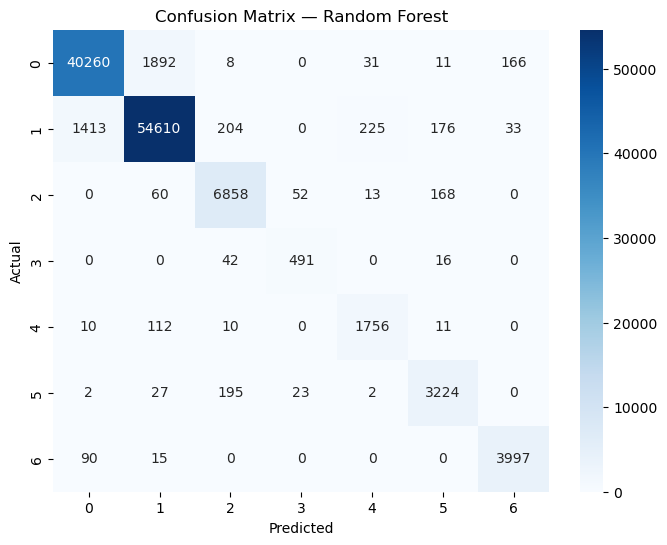

In [10]:
# Confusion Matrix — RF
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

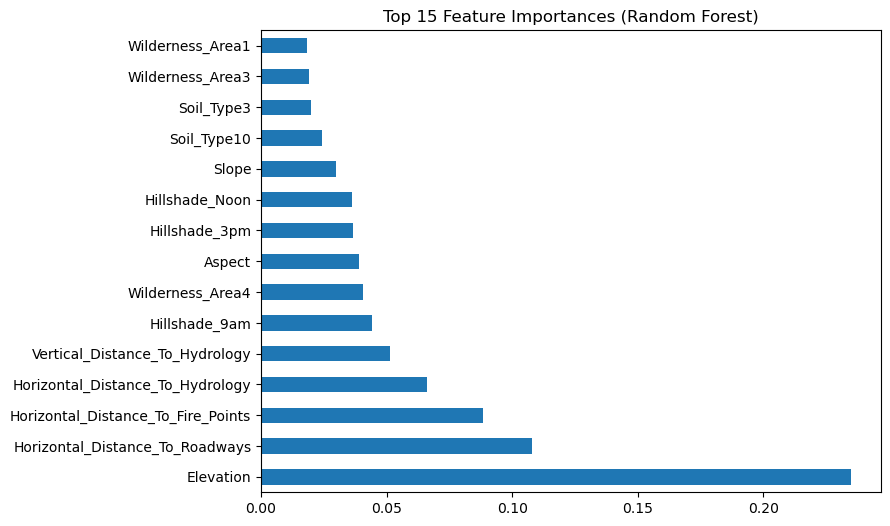

In [11]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind="barh", figsize=(8,6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

### Model 2: Logistic Regression

In [17]:
# ===== Model 2: Logistic Regression =====
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg.fit(X_train_bal, y_train_bal)
y_pred_lr = log_reg.predict(X_test_scaled)
print("===== Logistic Regression =====")
print(classification_report(y_test, y_pred_lr))

===== Logistic Regression =====
              precision    recall  f1-score   support

           1       0.68      0.66      0.67     42368
           2       0.79      0.52      0.63     56661
           3       0.70      0.57      0.63      7151
           4       0.29      0.88      0.44       549
           5       0.10      0.78      0.18      1899
           6       0.34      0.66      0.45      3473
           7       0.40      0.89      0.55      4102

    accuracy                           0.60    116203
   macro avg       0.47      0.71      0.51    116203
weighted avg       0.70      0.60      0.63    116203



### Model 3: Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)
y_pred_dt = dt.predict(X_test_scaled)

print("===== Decision Tree =====")
print(classification_report(y_test, y_pred_dt))

===== Decision Tree =====
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.95      0.94      0.94     56661
           3       0.92      0.93      0.92      7151
           4       0.84      0.85      0.84       549
           5       0.77      0.86      0.81      1899
           6       0.85      0.89      0.87      3473
           7       0.93      0.95      0.94      4102

    accuracy                           0.94    116203
   macro avg       0.88      0.91      0.90    116203
weighted avg       0.94      0.94      0.94    116203

